In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"week39.xlsx",engine='openpyxl')

In [4]:
df.head(5)

,Country,Country Name,quarter,average download speed,average upload speed,average latency
0,AL,Shqipëria,2019-01-01,15.30,7.33,27.72
1,AT,Österreich,2019-01-01,34.15,10.89,30.95
2,BE,Belgique/België,2019-01-01,62.19,13.86,17.87
3,BG,Bulgaria,2019-01-01,40.68,30.56,12.43
4,CH,Schweiz/Suisse/Svizzera,2019-01-01,88.88,48.23,17.06


In [5]:
df.sample(6)

,Country,Country Name,quarter,average download speed,average upload speed,average latency
449,CY,Kýpros,2022-01-01,49.56,18.53,16.40
481,AL,Shqipëria,2022-04-01,43.61,20.73,11.70
26,NL,Nederland,2019-01-01,83.39,38.87,13.74
105,RS,Serbia,2019-07-01,39.71,10.16,17.67
493,ES,España,2022-04-01,176.19,153.58,17.91
198,FR,France,2020-04-01,95.65,77.71,27.33


In [6]:
df['Country Name'].value_counts() < 14

Schweiz/Suisse/Svizzera    False
Eesti                      False
Bulgaria                   False
Liechtenstein              False
Shqipëria                  False
United Kingdom             False
Česko                      False
Sverige                    False
Danmark                    False
România                    False
Slovensko                  False
Éire/Ireland               False
Luxembourg                 False
Polska                     False
Crna Gora                  False
Deutschland                False
Österreich                 False
España                     False
Elláda                     False
Suomi/Finland              False
Malta                      False
Latvija                    False
Lietuva                    False
Ísland                     False
Slovenija                  False
Portugal                   False
Norge                      False
Magyarország               False
Hrvatska                   False
France                     False
Belgique/B

In [7]:
newDf = df.loc[~df['Country Name'].isin(['Kosovo','Ukraine','Moldova', 'Bosnia and Herzegovina'])]

In [8]:
newDf['Country Name'].value_counts()

Schweiz/Suisse/Svizzera    14
Bulgaria                   14
Shqipëria                  14
United Kingdom             14
Česko                      14
Sverige                    14
Danmark                    14
România                    14
Slovensko                  14
Éire/Ireland               14
Luxembourg                 14
Polska                     14
Crna Gora                  14
Deutschland                14
Österreich                 14
España                     14
Elláda                     14
Liechtenstein              14
Suomi/Finland              14
Eesti                      14
Malta                      14
Ísland                     14
Slovenija                  14
Portugal                   14
Norge                      14
Magyarország               14
Hrvatska                   14
France                     14
Latvija                    14
Türkiye                    14
Severna Makedonija         14
Nederland                  14
Serbia                     14
Italia    

In [58]:
cleanDf = newDf.drop("Country",axis=1).sort_values(["Country Name","quarter"]).set_index(["Country Name","quarter"])

In [59]:
cleanDf.head(9)

average download speed  average upload speed  \
Country Name    quarter                                                    
Belgique/België 2019-01-01                   62.19                 13.86   
                2019-04-01                   64.68                 13.90   
                2019-07-01                   68.24                 14.52   
                2019-10-01                   78.54                 15.45   
                2020-01-01                   76.78                 14.89   
                2020-04-01                   81.85                 16.55   
                2020-07-01                   83.71                 16.73   
                2020-10-01                   90.46                 16.97   
                2021-01-01                   95.76                 17.41   

                            average latency  
Country Name    quarter                      
Belgique/België 2019-01-01            17.87  
                2019-04-01            17.93  
                2019-07-01            16.84  
                2019-10-01            15.20  
                2020-01-01            15.23  
                2020-04-01            15.02  
                2020-07-01            15.36  
                2020-10-01            14.48  
                2021-01-01            14.11

In [70]:
cleanDf.loc["France"].index

DatetimeIndex(['2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
               '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
               '2022-01-01', '2022-04-01'],
              dtype='datetime64[ns]', name='quarter', freq=None)

In [64]:
franceData = cleanDf.loc["France"]

In [94]:
train = franceData[franceData.index <= pd.to_datetime("2021-07-01", format='%Y-%m-%d')]
test = franceData[franceData.index >= pd.to_datetime("2021-10-01", format='%Y-%m-%d')]

In [95]:
train

,average download speed,average upload speed,average latency
quarter,,,
2019-01-01,67.98,45.31,39.30
2019-04-01,68.00,47.82,40.76
2019-07-01,72.22,53.89,40.08
2019-10-01,85.77,69.58,29.38
2020-01-01,91.30,74.30,27.28
2020-04-01,95.65,77.71,27.33
2020-07-01,109.87,88.20,26.79
2020-10-01,130.37,105.18,22.27
2021-01-01,148.08,116.79,20.67


In [96]:
test

,average download speed,average upload speed,average latency
quarter,,,
2021-10-01,178.66,131.85,22.15
2022-01-01,191.96,147.43,19.65
2022-04-01,201.49,154.97,19.67


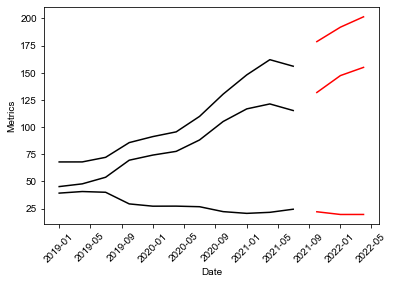

In [97]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Metrics')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [102]:
y = train['average latency']

In [103]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

c:\Users\91978\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
c:\Users\91978\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
c:\Users\91978\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\91978\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate startin

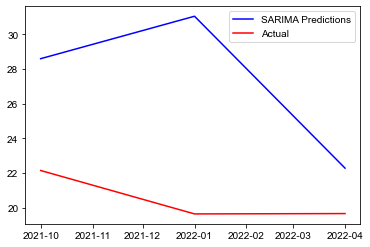

In [105]:
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.plot(test['average latency'], color='Red', label = 'Actual')
plt.legend()